# 11 - Plutonian Pebbles

https://adventofcode.com/2024/day/11


In [1]:
// Imports

import colors from "../../utils/colors.ts"
import objects from "../../utils/objects.ts"
import strings from "../../utils/strings.ts"
import numbers from "../../utils/numbers.ts"
import plots from "../../utils/plots.ts";

In [2]:
// Read Input
const file = await Deno.readTextFile("input-base.txt");
const stones = file.split(/\s+/).map(Number);
stones

[ 125, 17 ]

In [3]:
// Prepare Data

const linkedStones = {
    head: {
        value: stones[0],
        next: null
    },
    size: 1,
    blinks: 0
}

let current = linkedStones.head;
for (let i = 1; i < stones.length; i++) {
    current.next = {
        value: stones[i],
        next: null
    }
    current = current.next;
    linkedStones.size += 1;
}

const printLinkedEls = (head) => {
    let current = head;
    const values = [];
    while (current) {
        values.push(current.value);
        current = current.next;
    }
    console.log(`${values.join("->")}, size - ${values.length}`);
}

printLinkedEls(linkedStones.head);

125->17, size - 2


In [4]:
// part 1 - How many stones will you have after blinking 25 times?, Brute-force

import objects from "../../utils/objects.ts";

const updateStonesOnBlink = (linkedStones) => {
    let current = linkedStones.head;
    while (current !== null) {
        const value = current.value;
        // apply rules 
        // 1. If the stone is engraved with the number 0, it is replaced by a stone engraved with the number 1.
        if (value === 0) {
            current.value = 1;
            current = current.next;
            continue;
        }
        const valueStr = String(value);
        // 2. If the stone is engraved with a number that has an even number of digits, it is replaced by two stones. The left half of the digits are engraved on the new left stone, and the right half of the digits are engraved on the new right stone. (The new numbers don't keep extra leading zeroes: 1000 would become stones 10 and 0.)
        const valueStrLength = valueStr.length;
        if (valueStrLength % 2 === 0) {
            const left = Number(valueStr.slice(0, valueStrLength / 2));
            const right = Number(valueStr.slice(valueStrLength / 2));
            current.value = left;
            current.next = {
                value: right,
                next: current.next
            }
            linkedStones.size += 1;
            current = current.next.next;
            continue;
        }
        // 3. If none of the other rules apply, the stone is replaced by a new stone; the old stone's number multiplied by 2024 is engraved on the new stone.
        current.value = value * 2024;
        current = current.next;
    }
    return linkedStones;
}

const localLinkedStones = objects.deepCopy(linkedStones);
while (localLinkedStones.blinks < 25) {
    updateStonesOnBlink(localLinkedStones);
    localLinkedStones.blinks += 1;
    // printLinkedEls(localLinkedStones.head);
};
localLinkedStones.size;

55312

In [5]:
// part 2 - How many stones will you have after blinking 75 times? Brute-force won't work

const cache = {};
const fetchKey = (i, j) => `${i}-${j}`;
const fetchFutureStonesOnBlink = (value) => {
    if (value === 0) return [1];
    const valueStr = String(value);
    const valueStrLength = valueStr.length;
    if (valueStrLength % 2 === 0) {
        const left = Number(valueStr.slice(0, valueStrLength / 2));
        const right = Number(valueStr.slice(valueStrLength / 2));
        return [left, right];;
    }
    return [value * 2024];
}
const findBlinkSize = (el, blink) => {
    if (blink === 0) {
        return 1;
    }
    const key = fetchKey(el, blink);
    if (cache[key]) {
        return cache[key];
    };
    const nextStones = fetchFutureStonesOnBlink(el);
    const size = findBlinkSize(nextStones[0], blink - 1) + (Number.isInteger(nextStones[1]) ? findBlinkSize(nextStones[1], blink - 1) : 0);
    cache[key] = size;
    return size;
};

stones.reduce((acc, el) => acc + findBlinkSize(el, 75), 0);

65601038650482

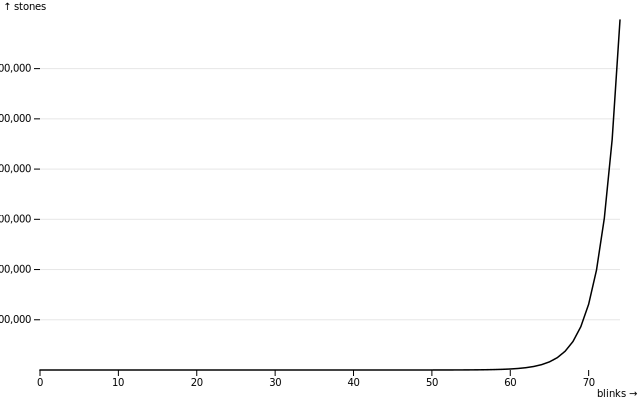

In [6]:
// visualization

const x = new Array(75).fill(0).map((_, i) => i);
const y = x.map(i => findBlinkSize(2024, i));
const show = plots.lineGraph(x, y, { x: "blinks", y: "stones" })
await show()